In [3]:
import pandas as pd
import thebeat
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load ITIs df
df = pd.read_csv(os.path.join('data', 'experiment', 'processed', 'ITIs.csv'))

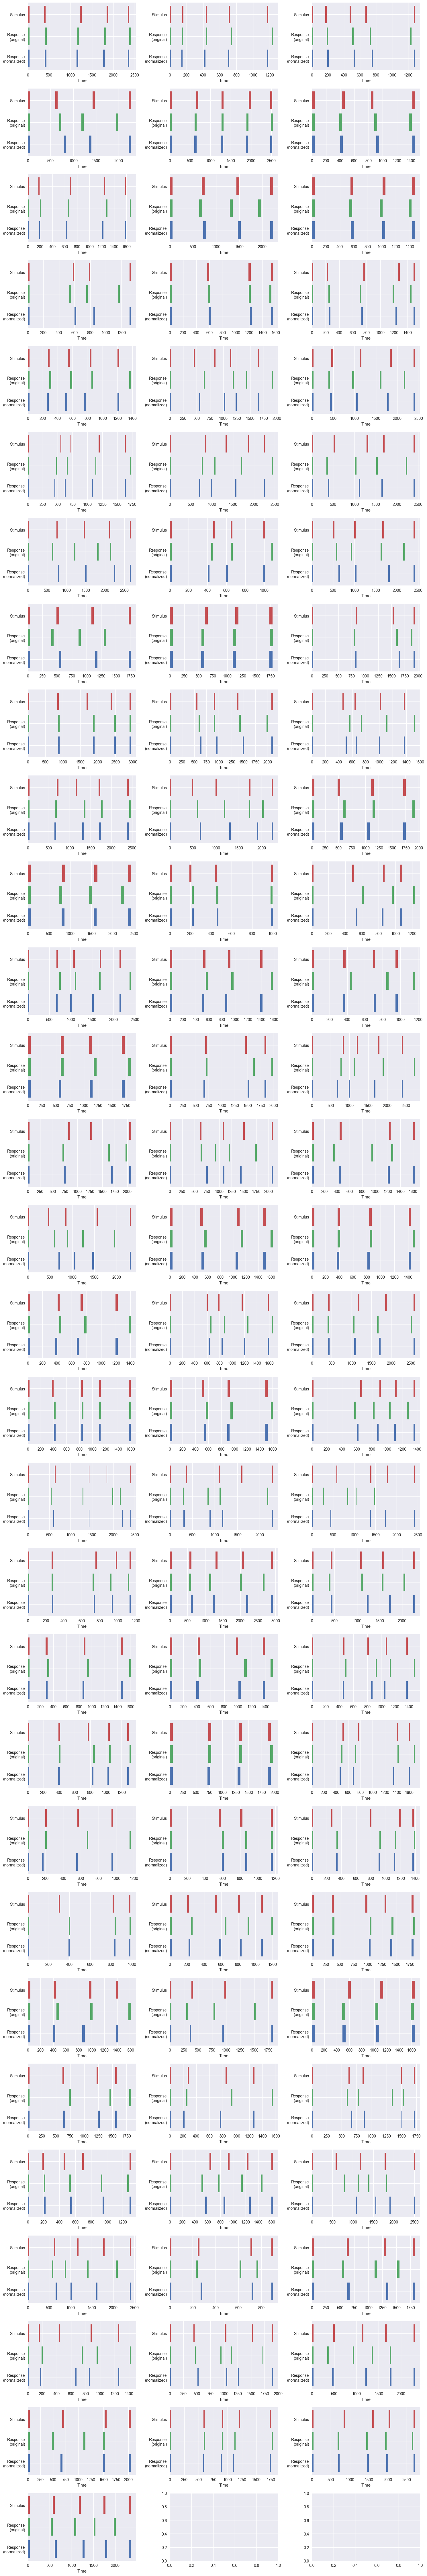

In [5]:
plt.style.use("seaborn-v0_8")

fig, axs = plt.subplots(30, 3, figsize=(15, 90), tight_layout=True)

sequence_ids = np.random.choice(df.sequence_id.unique(), 90)
df_short = df[df.sequence_id.isin(sequence_ids)]

count = 0

for seq_id, seq_df in df_short.groupby("sequence_id"):
    stimulus = thebeat.Sequence(seq_df["stim_ioi"].values)
    resp_orig = thebeat.Sequence(seq_df["resp_iti"].values)
    resp_norm = thebeat.Sequence(seq_df["resp_iti_norm"].values)

    thebeat.visualization.plot_multiple_sequences(
        [stimulus, resp_orig, resp_norm],
        y_axis_labels=["Stimulus", "Response\n(original)", "Response\n(normalized)"],
        ax=axs[count // 3, count % 3],
    )
    count += 1